Original Euclidean Distance: 2.77
Smoothed Euclidean Distance (7-MA): 0.92


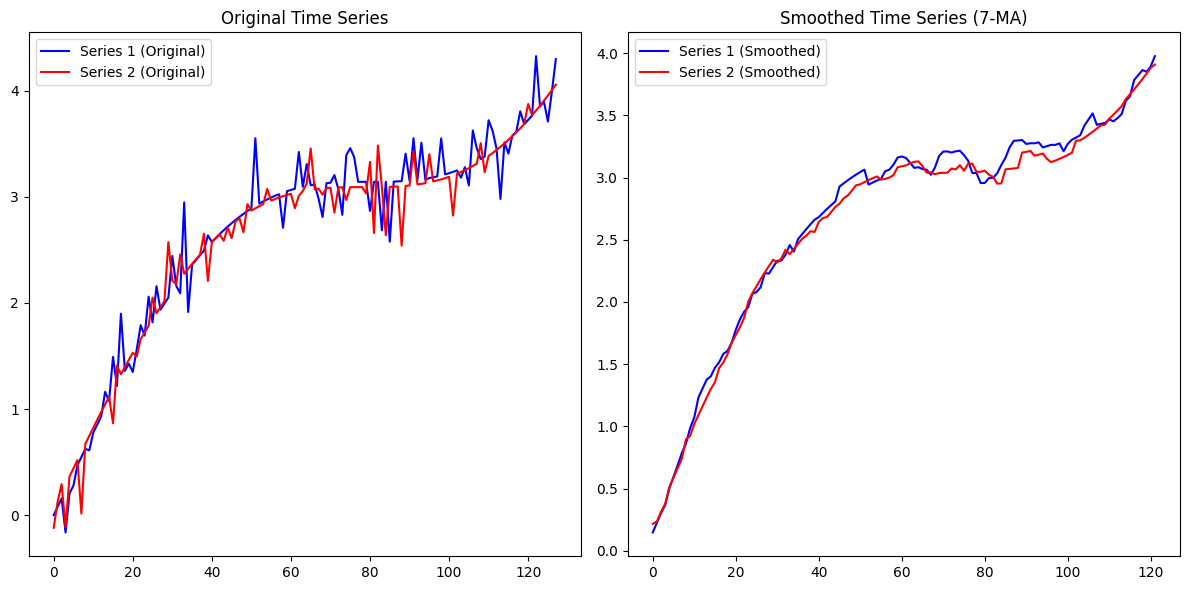

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Define the K-order Moving Average function
def k_ma(sequence, k):
    return np.convolve(sequence, np.ones(k)/k, mode='valid')

# Generate noise with some points having zero noise
def gen_noise(length, noise_probability = 0.3):
    noise = np.random.normal(0, 0.3, length)
    random_mask = np.random.rand(length) > noise_probability  # Set some points with no noise
    noise[random_mask] = 0  # Make the noise of certain points equal to 0
    return noise

# 2. Generate two similar but visually different time series with high Euclidean distance
def generate_time_series(length=128):
    t = np.linspace(0, 10, length) 

    # Add noise to both time series
    series_1 = 0.5*t + np.sin(0.5 * t) + gen_noise(length)  # Sine wave with noise
    series_2 = 0.5*t + np.sin(0.5 * t + 0.05) + gen_noise(length)  # Phase-shifted sine wave with noise
    return series_1, series_2

# 3. Calculate Euclidean distance
def euclidean_distance(seq1, seq2):
    return np.sqrt(np.sum((seq1 - seq2) ** 2))

# 4. Plot the original and smoothed time series for comparison
def plot_series(original1, original2, smoothed1, smoothed2):
    plt.figure(figsize=(12, 6))
    
    # Plot original time series
    plt.subplot(1, 2, 1)
    plt.plot(original1, label="Series 1 (Original)", color='b')
    plt.plot(original2, label="Series 2 (Original)", color='r')
    plt.title("Original Time Series")
    plt.legend()

    # Plot smoothed time series
    plt.subplot(1, 2, 2)
    plt.plot(smoothed1, label="Series 1 (Smoothed)", color='b')
    plt.plot(smoothed2, label="Series 2 (Smoothed)", color='r')
    plt.title("Smoothed Time Series (7-MA)")
    plt.legend()

    plt.tight_layout()
    plt.show()

# 5. Main program
if __name__ == "__main__":
    # Generate two time series
    series_1, series_2 = generate_time_series()

    # Calculate the Euclidean distance of the original time series
    original_distance = euclidean_distance(series_1, series_2)
    print(f"Original Euclidean Distance: {original_distance:.2f}")

    # Apply 7-MA smoothing
    smoothed_1 = k_ma(series_1, 7)
    smoothed_2 = k_ma(series_2, 7)

    # Calculate the Euclidean distance after smoothing
    smoothed_distance = euclidean_distance(smoothed_1, smoothed_2)
    print(f"Smoothed Euclidean Distance (7-MA): {smoothed_distance:.2f}")

    # Plot the results
    plot_series(series_1, series_2, smoothed_1, smoothed_2)
